In [1]:
import numpy as np
import pandas as pd
import unittest
#import finalproject
from die import Die

class Die():
    '''General Definition
    A die has 𝑁 sides, or “faces”, and 𝑊 weights,
    and can be rolled to select a face.
    For example, a “die” with 𝑁=2 is a coin, and
    a one with 𝑁=6 is a standard die.
    Normally, dice and coins are “fair,” meaning that the
    each side has an equal weight.
    An unfair die is one where the weights are unequal.
    Each side contains a unique symbol.
    Symbols may be all alphabetic or all numeric.
    𝑊 defaults to 1.0 for each face
    but can be changed after the object is created.
    The weights are just positive numbers (integers or floats, including 0),
    not a normalized probability distribution.
    The die has one behavior, which is to be rolled one or more times.
    Specific Methods and Attributes:
        1. An initializer
        2. Change the weight of a single side.
        3. Create die
        4. Roll die
        5. Show die's current state
    '''
    def __init__(self, faces):
        self.faces = faces
        ''' Takes a NumPy array of faces as an argument.'''

        # verify faces is type (np.ndarray); TypeError if not
        if not isinstance (self.faces, np.ndarray):
            raise TypeError('faces is not an np array')

        # Tests to see if the values are distinct; ValueError if not
        if len(self.faces) != len(set(self.faces)):    # 'set' values are unique
            raise ValueError('faces are not unique')
            # NOTE: faces = np.unique (faces) removes "redundant" values        

        # Internally initializes the weights to 1.0 for each face.
        weights = np.ones(len(self.faces))
        #print (faces, weights)

        # Saves both faces and weights in a private data frame
        #   with faces in the index.
        index_values = [self.faces]
        self.faces_df = pd.DataFrame({'weights': weights}, index=index_values)

    def change_weight (self, face_to_change, new_weight):
        '''Takes two arguments: the face value to be changed and the new weight.'''
#        self.face_to_change = face_to_change
#        self.new_weight = new_weight

        # Checks to see if the face passed is valid value,
        #   i.e. if it is in the die array; IndexError if not
        if face_to_change not in self.faces_df.index:
#        if self.face_to_change not in self.faces_df.values:
            raise IndexError('face_to_change not in faces.df')

        # Checks to see if the weight is a valid type,
        #   i.e. if it is numeric (integer or float); TypeError if not
#        if not isinstance(self.new_weight, (int, float)):
        if not isinstance(new_weight, (int, float)):
            raise TypeError('new_weight is not valid type')
           
        # change face's weight
        # subtract 1 to change correct face due to Python offset
        self.faces_df.loc[face_to_change-1] = new_weight
        
    def create_die (self, faces_df):
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        n_sides = len(self.faces_df.weights)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        return self.die

    def roll_die (self, number_of_rolls):
        '''takes a parameter of how many times the die is to be rolled; defaults to 1.'''
#        self.number_of_rolls = number_of_rolls
        # print (self.die, '\nsum of weights:', sum(self.die.weights))
        # print ('number of rolls:', self.number_of_rolls)   

        # This is essentially a random sample with replacement,
        #   from the private die data frame, that applies the weights.
        results = []
        for i in range(number_of_rolls):
            result = self.die.side.sample(weights=self.die.weights, replace=True).values[0]
            results.append(result)
        self.result = pd.DataFrame(results)
        return (self.result)
        #return pd.Series(results)
        
    def show_die_state(self, die):
        '''A method to show the die’s current state.
        Returns a copy of the private die data frame.'''
        self.die = die
        die_deep = self.die.copy()
#        die_deep
        return die_deep
        
    def plot_results(self, my_results):
        '''Show the results of rolling the dice n times with a simple bar graph.'''
        my_results.value_counts().sort_index().plot.bar(rot=0);
        NARROW = pd.DataFrame(my_results).stack
        print ('NARROW:\n', NARROW)
        WIDE = pd.DataFrame(my_results).unstack()
        print ('my_results dimensions:', my_results.shape)
        print ('WIDE dimentions:', WIDE.shape)
        print ('WIDE:', WIDE)

initialized in test:
weight changed in test:
die created in test:
show die state2 in test:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
roil_die in test:
results:    0
0  4
1  1
2  4
3  4
4  4
5  4
6  2
7  4
8  4
9  4


/sfs/gpfs/tardis/home/wpl3a/ (unittest.loader._FailedTest./sfs/gpfs/tardis/home/wpl3a/) ... ERROR

ERROR: /sfs/gpfs/tardis/home/wpl3a/ (unittest.loader._FailedTest./sfs/gpfs/tardis/home/wpl3a/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/sfs/gpfs/tardis/home/wpl3a/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


NARROW:
 <bound method DataFrame.stack of    0
0  4
1  1
2  4
3  4
4  4
5  4
6  2
7  4
8  4
9  4>
my_results dimensions: (10, 1)
WIDE dimentions: (10,)
WIDE: 0  0    4
   1    1
   2    4
   3    4
   4    4
   5    4
   6    2
   7    4
   8    4
   9    4
dtype: int64
plot_results in test:


SystemExit: True

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


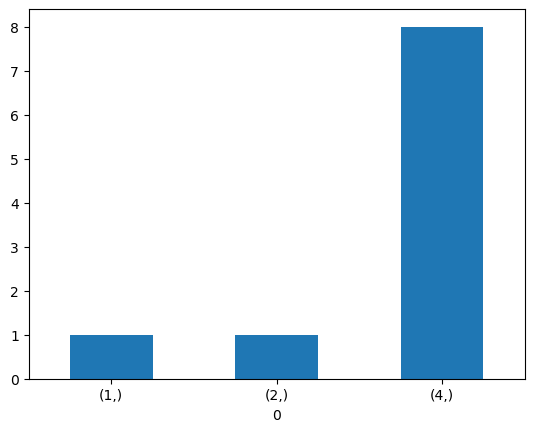

In [1]:
import numpy as np
import pandas as pd
import unittest
from die import Die

class DieTestSuite(unittest.TestCase):
    
    def test_1_change_weight(self): 
        # 
        print ('entering test_1_change_weight')        
 
        faces = np.arange (6)  # creates array
        faces_df = Die(faces)
        print ('initialized:')

        faces_df.change_weight (4, 5)
        print ('weight changed:')

    def test_2_create_die(self):
        print ('entering test_2_create_die')
        # 
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        n_sides = len(self.faces_df.weights)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        self.assertTrue(isinstance (self.die, pd.DataFrame))
#        return self.die

    def test_3_roll_die(self):
        print ('entering test_3_roll_die')        
        # 
#        self.number_of_rolls = number_of_rolls
        # print (self.die, '\nsum of weights:', sum(self.die.weights))
        # print ('number of rolls:', self.number_of_rolls)   ##

        # This is essentially a random sample with replacement,
        #   from the private die data frame, that applies the weights.
        results = []
        for i in range(self.number_of_rolls):
            result = self.die.side.sample(weights=self.die.weights, replace=True).values[0]
            results.append(result)
        self.result = pd.DataFrame(results)
        self.assertTrue(self.number_of_rolls >= 0)
        return (self.result)
        #return pd.Series(results)

    def test_4_show_die_state(self):
        print ('entering test_4_show_die_state')
        self.die = die
        die_deep = self.die.copy()
        self.assertTrue(isinstance (die_deep, pd.DataFrame))
        return die_deep

faces = np.arange (6)  # creates array
faces_df = Die(faces)
print ('initialized in test:')

faces_df.change_weight (4, 5)
print ('weight changed in test:')

die = faces_df.create_die (faces_df)    # create die with updated weights
print ('die created in test:')
#print ('this is the created die:\n', die)

#print ('show die state with method call:')
die_deep2 = faces_df.show_die_state (die)
print ('show die state2 in test:\n', die_deep2)

results = faces_df.roll_die(10)
print ('roil_die in test:')
print ('results:', results)
faces_df.plot_results (results)
print ('plot_results in test:')


if __name__ == '__main__':
    unittest.main(verbosity=3)


initialized in test:
weight changed in test:
die created in test:
show die state2 in test:
    side  weights
0     1      0.1
1     2      0.1
2     3      0.1
3     4      0.5
4     5      0.1
5     6      0.1
roil_die in test:
results:    0
0  4
1  4
2  1
3  4
4  4
5  1
6  3
7  2
8  6
9  2
plot_results in test:


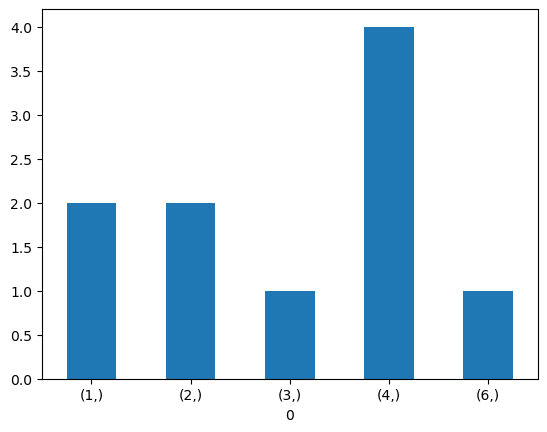

In [4]:
faces = np.arange (6)  # creates array
faces_df = Die(faces)
print ('initialized in test:')

faces_df.change_weight (4, 5)
print ('weight changed in test:')

die = faces_df.create_die (faces_df)    # create die with updated weights
print ('die created in test:')
#print ('this is the created die:\n', die)

#print ('show die state with method call:')
die_deep2 = faces_df.show_die_state (die)
print ('show die state2 in test:\n', die_deep2)

results = faces_df.roll_die(10)
print ('roil_die in test:')
print ('results:', results)
faces_df.plot_results (results)
print ('plot_results in test:')
